In [47]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [48]:
# make sure pandas is version 1.0 or higher
# make sure networkx is verion 2.4 or higher
print(pd.__version__)
print(nx.__version__)

2.0.1
3.1


In [49]:
from ema_workbench import (
    Model,
    Policy,
    ema_logging,
    SequentialEvaluator,
    MultiprocessingEvaluator,
)
from dike_model_function import DikeNetwork  # @UnresolvedImport
from problem_formulation import get_model_for_problem_formulation, sum_over, sum_over_time



In [50]:
ema_logging.log_to_stderr(ema_logging.INFO)

# choose problem formulation number, between 0-5
# each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(0)

In [51]:
# enlisting uncertainties, their types (RealParameter/IntegerParameter/CategoricalParameter), lower boundary, and upper boundary
import copy

for unc in dike_model.uncertainties:
    print(repr(unc))

uncertainties = copy.deepcopy(dike_model.uncertainties)

CategoricalParameter('discount rate 0', [0, 1, 2, 3])
CategoricalParameter('discount rate 1', [0, 1, 2, 3])
CategoricalParameter('discount rate 2', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132, resolution=None, default=None, variable_name=['A.0_ID flood wave shape'], pff=False)
RealParameter('A.1_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.1_Bmax'], pff=False)
RealParameter('A.1_pfail', 0, 1, resolution=None, default=None, variable_name=['A.1_pfail'], pff=False)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.2_Bmax'], pff=False)
RealParameter('A.2_pfail', 0, 1, resolution=None, default=None, variable_name=['A.2_pfail'], pff=False)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.3_Bmax'], pff=False)
RealParameter('A.3_pfail', 0, 1, resolution=None, default=None, variable_name=['A.3_pfai

In [52]:
# enlisting policy levers, their types (RealParameter/IntegerParameter), lower boundary, and upper boundary
for policy in dike_model.levers:
    print(repr(policy))

levers = copy.deepcopy(dike_model.levers)

IntegerParameter('0_RfR 0', 0, 1, resolution=None, default=None, variable_name=['0_RfR 0'], pff=False)
IntegerParameter('0_RfR 1', 0, 1, resolution=None, default=None, variable_name=['0_RfR 1'], pff=False)
IntegerParameter('0_RfR 2', 0, 1, resolution=None, default=None, variable_name=['0_RfR 2'], pff=False)
IntegerParameter('1_RfR 0', 0, 1, resolution=None, default=None, variable_name=['1_RfR 0'], pff=False)
IntegerParameter('1_RfR 1', 0, 1, resolution=None, default=None, variable_name=['1_RfR 1'], pff=False)
IntegerParameter('1_RfR 2', 0, 1, resolution=None, default=None, variable_name=['1_RfR 2'], pff=False)
IntegerParameter('2_RfR 0', 0, 1, resolution=None, default=None, variable_name=['2_RfR 0'], pff=False)
IntegerParameter('2_RfR 1', 0, 1, resolution=None, default=None, variable_name=['2_RfR 1'], pff=False)
IntegerParameter('2_RfR 2', 0, 1, resolution=None, default=None, variable_name=['2_RfR 2'], pff=False)
IntegerParameter('3_RfR 0', 0, 1, resolution=None, default=None, variable

In [53]:
# enlisting outcomes
for outcome in dike_model.outcomes:
    print(repr(outcome))

ScalarOutcome('All Costs', variable_name=('A.1_Expected Annual Damage', 'A.2_Expected Annual Damage', 'A.3_Expected Annual Damage', 'A.4_Expected Annual Damage', 'A.5_Expected Annual Damage', 'A.1_Dike Investment Costs', 'A.2_Dike Investment Costs', 'A.3_Dike Investment Costs', 'A.4_Dike Investment Costs', 'A.5_Dike Investment Costs', 'RfR Total Costs', 'Expected Evacuation Costs'), function=<function sum_over at 0x000001A9F2F0F9C0>)
ScalarOutcome('Expected Number of Deaths', variable_name=('A.1_Expected Number of Deaths', 'A.2_Expected Number of Deaths', 'A.3_Expected Number of Deaths', 'A.4_Expected Number of Deaths', 'A.5_Expected Number of Deaths'), function=<function sum_over at 0x000001A9F2F0F9C0>)


In [54]:
# running the model through EMA workbench
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=50, policies=4)

[MainProcess/INFO] pool started with 12 workers
[MainProcess/INFO] performing 50 scenarios * 4 policies * 1 model(s) = 200 experiments
100%|████████████████████████████████████████| 200/200 [00:20<00:00,  9.69it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [55]:
# observing the simulation runs
experiments, outcomes = results
print(outcomes.keys())
experiments

dict_keys(['All Costs', 'Expected Number of Deaths'])


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,11,118.250417,10.0,0.536397,206.443621,1.5,0.260306,179.036179,1.0,0.954833,...,4,10,3,8,9,1,1,312,308,dikesnet
1,118,133.157099,10.0,0.453822,336.128647,1.0,0.932685,277.773947,1.0,0.585785,...,4,10,3,8,9,1,1,313,308,dikesnet
2,77,270.073158,1.0,0.507261,320.737125,1.5,0.681905,68.837610,1.5,0.925033,...,4,10,3,8,9,1,1,314,308,dikesnet
3,20,162.786370,10.0,0.403206,113.040221,1.5,0.880676,215.400181,1.0,0.198799,...,4,10,3,8,9,1,1,315,308,dikesnet
4,116,169.023079,10.0,0.584919,262.533034,1.0,0.791052,315.830634,10.0,0.667266,...,4,10,3,8,9,1,1,316,308,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,45,185.334825,1.0,0.398813,292.547112,10.0,0.186460,253.827046,1.5,0.787778,...,7,7,7,9,6,8,4,357,311,dikesnet
196,53,279.783989,1.5,0.247252,311.221313,1.0,0.915726,233.062736,1.0,0.282221,...,7,7,7,9,6,8,4,358,311,dikesnet
197,89,132.113922,10.0,0.743403,99.954445,10.0,0.627841,281.266335,10.0,0.521388,...,7,7,7,9,6,8,4,359,311,dikesnet
198,84,76.069386,1.5,0.806178,155.144042,10.0,0.510386,98.550182,1.5,0.161302,...,7,7,7,9,6,8,4,360,311,dikesnet


In [56]:
# only works because we have scalar outcomes
pd.DataFrame(outcomes)

,All Costs,Expected Number of Deaths
0,1.620381e+09,0.002782
1,1.610259e+09,0.000299
2,1.609983e+09,0.000108
3,1.609302e+09,0.000000
4,1.609302e+09,0.000000
...,...,...
195,1.929281e+09,0.002384
196,1.909418e+09,0.000630
197,1.908311e+09,0.000185
198,1.920369e+09,0.001897


In [58]:
# defining specific policies
# for example, policy 1 is about extra protection in upper boundary
# policy 2 is about extra protection in lower boundary
# policy 3 is extra protection in random locations


def get_do_nothing_dict():
    return {l.name: 0 for l in dike_model.levers}


policies = [
    Policy(
        "policy 1",
        **dict(
            get_do_nothing_dict(),
            **{"0_RfR 0": 1, "0_RfR 1": 1, "0_RfR 2": 1, "A.1_DikeIncrease 0": 5}
        )
    ),
    Policy(
        "policy 2",
        **dict(
            get_do_nothing_dict(),
            **{"4_RfR 0": 1, "4_RfR 1": 1, "4_RfR 2": 1, "A.5_DikeIncrease 0": 5}
        )
    ),
    Policy(
        "policy 3",
        **dict(
            get_do_nothing_dict(),
            **{"1_RfR 0": 1, "2_RfR 1": 1, "3_RfR 2": 1, "A.3_DikeIncrease 0": 5}
        )
    ),
    Policy(
        "policy zero",
        **dict(
            get_do_nothing_dict(),
            **{}
        )
    ),
]

In [59]:
# pass the policies list to EMA workbench experiment runs
n_scenarios = 100
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios, policies)

[MainProcess/INFO] pool started with 12 workers
[MainProcess/INFO] performing 100 scenarios * 4 policies * 1 model(s) = 400 experiments
100%|████████████████████████████████████████| 400/400 [00:45<00:00,  8.76it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [60]:
experiments, outcomes = results

In [61]:
# only works because we have scalar outcomes
pd.DataFrame(outcomes)

,All Costs,Expected Number of Deaths
0,1.075037e+09,1.482401
1,8.335087e+08,0.774646
2,1.924923e+09,1.089942
3,4.038551e+08,0.123109
4,6.888608e+08,0.250715
...,...,...
395,6.870624e+08,0.759382
396,2.972034e+09,1.817518
397,2.041001e+09,2.316472
398,1.219827e+09,1.099539


In [62]:
experiments

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
0,56,189.578785,1.0,0.760474,279.275148,10.0,0.912648,244.597383,1.0,0.275233,...,0,0,0,0,0,0,0,362,policy 1,dikesnet
1,90,236.948495,10.0,0.154502,173.924777,1.5,0.928364,103.521763,1.5,0.365267,...,0,0,0,0,0,0,0,363,policy 1,dikesnet
2,130,126.586357,10.0,0.878980,148.153967,1.0,0.109791,41.519321,1.5,0.872314,...,0,0,0,0,0,0,0,364,policy 1,dikesnet
3,104,253.546138,1.5,0.920117,226.165639,1.5,0.761267,205.899480,1.5,0.923098,...,0,0,0,0,0,0,0,365,policy 1,dikesnet
4,99,63.888523,1.5,0.828791,110.921633,1.0,0.329662,113.014855,1.0,0.687897,...,0,0,0,0,0,0,0,366,policy 1,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,5,349.560553,1.0,0.840210,200.481911,1.0,0.027412,174.027971,10.0,0.507027,...,0,0,0,0,0,0,0,457,policy zero,dikesnet
396,89,38.523577,1.0,0.335041,198.605952,1.5,0.510096,308.728964,1.5,0.671300,...,0,0,0,0,0,0,0,458,policy zero,dikesnet
397,44,147.310364,10.0,0.998287,255.445243,10.0,0.138182,147.556663,10.0,0.214214,...,0,0,0,0,0,0,0,459,policy zero,dikesnet
398,116,165.471979,10.0,0.561265,312.374061,10.0,0.142215,130.137390,1.0,0.398200,...,0,0,0,0,0,0,0,460,policy zero,dikesnet


In [63]:
policies = experiments['policy']
data = pd.DataFrame.from_dict(outcomes)
data['policy'] = policies

In [64]:
data

,All Costs,Expected Number of Deaths,policy
0,1.075037e+09,1.482401,policy 1
1,8.335087e+08,0.774646,policy 1
2,1.924923e+09,1.089942,policy 1
3,4.038551e+08,0.123109,policy 1
4,6.888608e+08,0.250715,policy 1
...,...,...,...
395,6.870624e+08,0.759382,policy zero
396,2.972034e+09,1.817518,policy zero
397,2.041001e+09,2.316472,policy zero
398,1.219827e+09,1.099539,policy zero


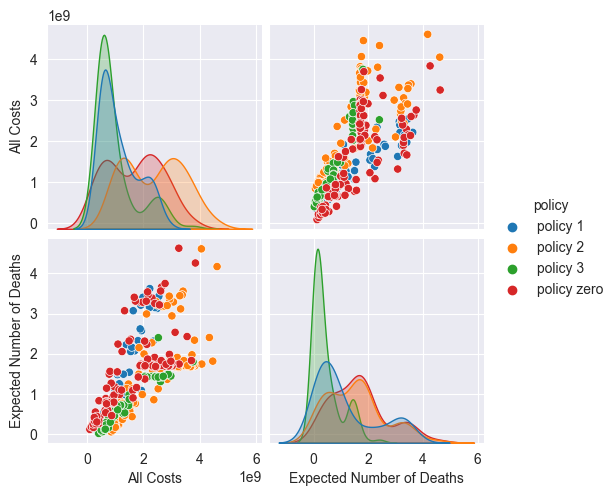

In [65]:
sns.pairplot(data, hue='policy',  vars=outcomes.keys(), )
plt.show()